In [1]:
import pandas as pd 
import numpy as np 
import math
import env

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

import acquire as ac 

# import

In [2]:
df = ac.get_groceries_data(ac.get_connection)

In [3]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


# Select variables you want to cluster: df = df[["col1", "col2"]]

In [4]:
fre_fro = df[['Fresh','Frozen']]

In [5]:
# let's see if fresh and froze show any anomalies
fre_fro

,Fresh,Frozen
0,12669,214
1,7057,1762
2,6353,2405
3,13265,6404
4,22615,3915
...,...,...
435,29703,13135
436,39228,4510
437,14531,437
438,10290,1038


# Convert to array & dtype float: np_array = df.values.astype("float32", copy = False)

In [6]:
fre_fro = fre_fro.values.astype('float32',copy = False)

# Scale to standard normal:

# scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)

In [7]:
# creating an object instance
scaler = MinMaxScaler()

In [8]:
# fit scaler object
scaler.fit(fre_fro)

MinMaxScaler()

In [9]:
# apply the scaler
fre_fro = scaler.transform(fre_fro) 

# Create DBSCAN object and fit: dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

In [10]:
# create the dbscan object
# min of 20 samples and a radius of .1
dbsc = DBSCAN(eps = .10, min_samples = 20)

In [11]:
# fit object
dbsc.fit(fre_fro)

DBSCAN(eps=0.1, min_samples=20)

# Extract labels: labels = dbsc.labels_

# Add labels back to original dataframe:

In [12]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["fresh", 'frozen']
scaled_columns = ["scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(fre_fro, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,scaled_fresh,scaled_frozen
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.003106
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.028548
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.039116
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.104842
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.063934


# df['labels'] = labels

In [13]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    430
-1     10
Name: labels, dtype: int64

In [14]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,scaled_fresh,scaled_frozen,labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.003106,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.028548,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.039116,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.104842,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.063934,0


# Explore:
# df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)

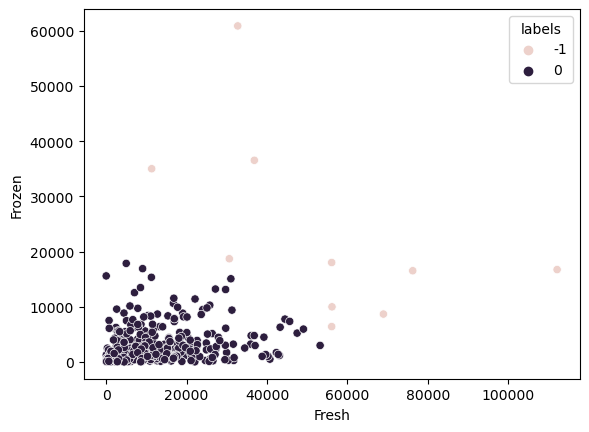

In [15]:
sns.scatterplot(x=df.Fresh, y=df.Frozen, hue=df.labels)
plt.show()  

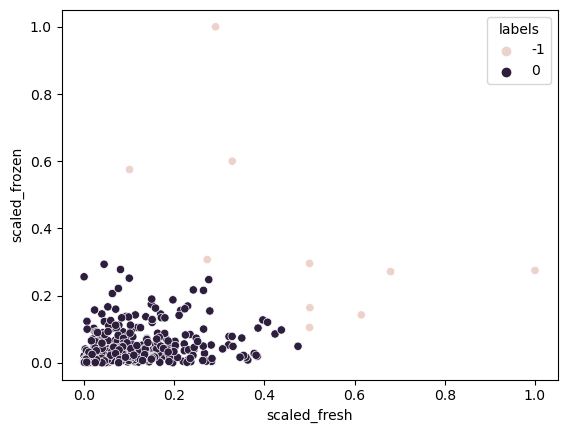

In [16]:
sns.scatterplot(x=df.scaled_fresh, y=df.scaled_frozen, hue=df.labels)
plt.show()

In [17]:
df.columns.to_list()

['customer_id',
 'Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'scaled_fresh',
 'scaled_frozen',
 'labels']

In [18]:
# pass a list to scale
def scaling(df):
    '''
    Input: Dataframe with    '''
    
    col_names = df.columns.to_list()
    # create a series
    dfse = df.values.astype('float32',copy = False)
    
    # Make the scaler
    scaler = MinMaxScaler()

    # Fit the scaler
    scaler.fit(dfse)

    # Use the scaler
    dfse = scaler.transform(dfse)
        
    # # Make the object
    dbsc = DBSCAN(eps = .10, min_samples = 20)

    # Fit the object
    dbsc.fit(dfse)
    
    # Now, let's add the scaled value columns back onto the dataframe
   
    scaled_columns = ["Scaled_" + column for column in col_names]

    # Save a copy of the original dataframe
    original_df = df.copy()

    # Create a dataframe containing the scaled values
    scaled_df = pd.DataFrame(dfse, columns=scaled_columns)

    # Merge the scaled and non-scaled values into one dataframe
    df = df.merge(scaled_df, on=df.index)
    df = df.drop(columns=['key_0'])
    
    df['labels'] = dbsc.labels_
    df.labels.value_counts()
    return df
        

In [19]:
dfTEST = scaling(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [20]:
clus = dfTEST[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','labels']]

the relation cluster of Fresh and Fresh


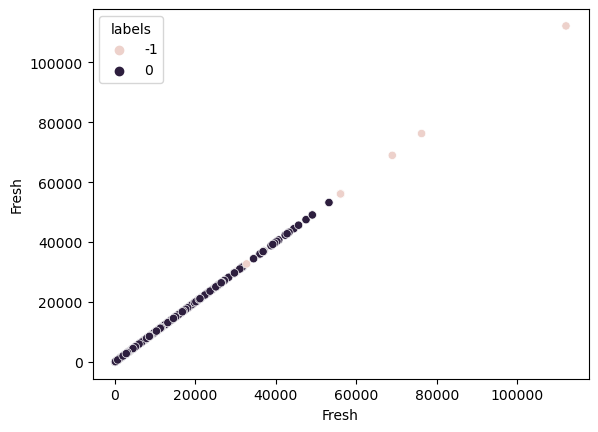

the relation cluster of Fresh and Milk


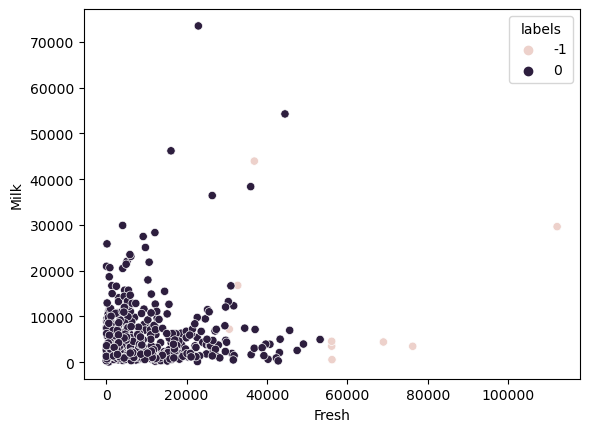

the relation cluster of Fresh and Grocery


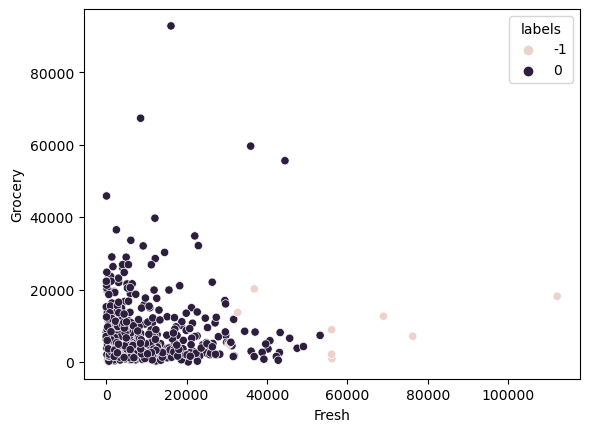

the relation cluster of Fresh and Frozen


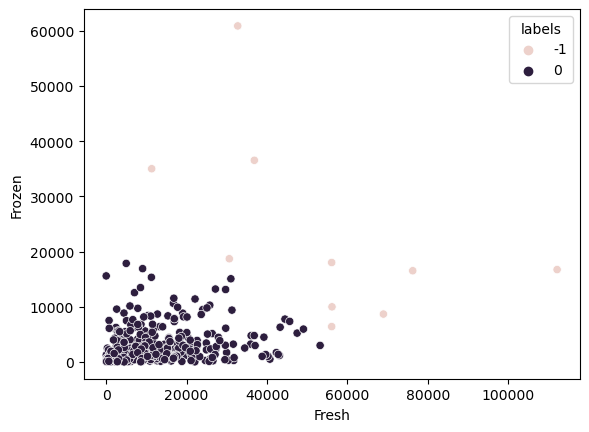

the relation cluster of Fresh and Detergents_Paper


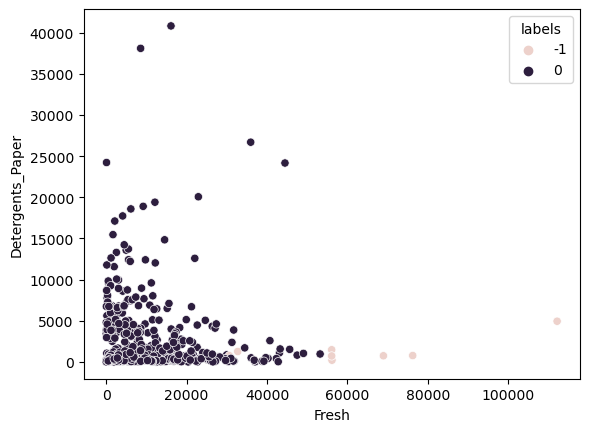

the relation cluster of Fresh and Delicassen


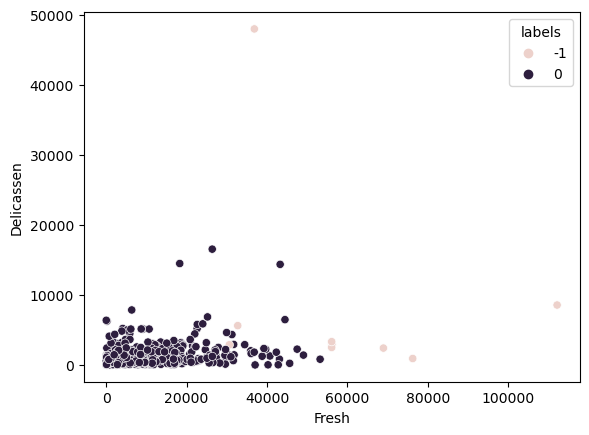

the relation cluster of Fresh and labels


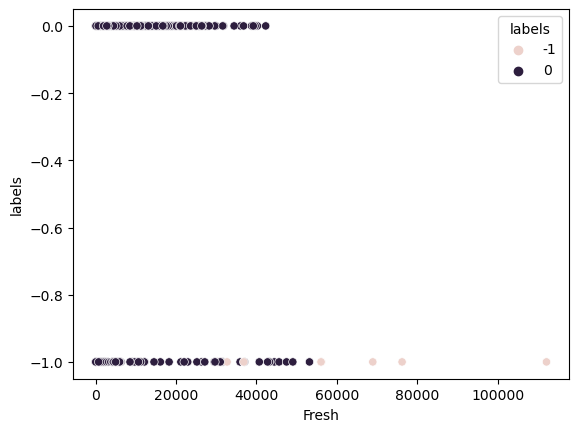

the relation cluster of Milk and Fresh


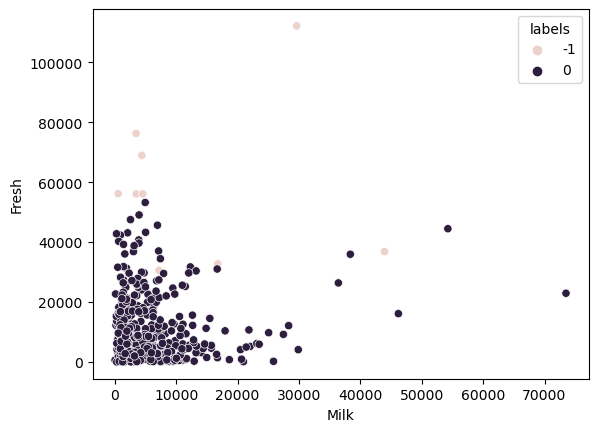

the relation cluster of Milk and Milk


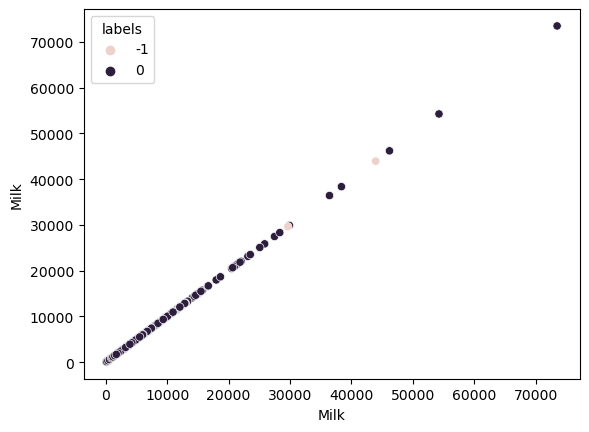

the relation cluster of Milk and Grocery


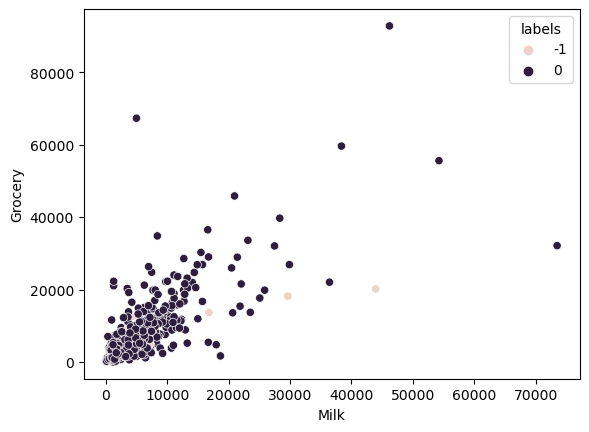

the relation cluster of Milk and Frozen


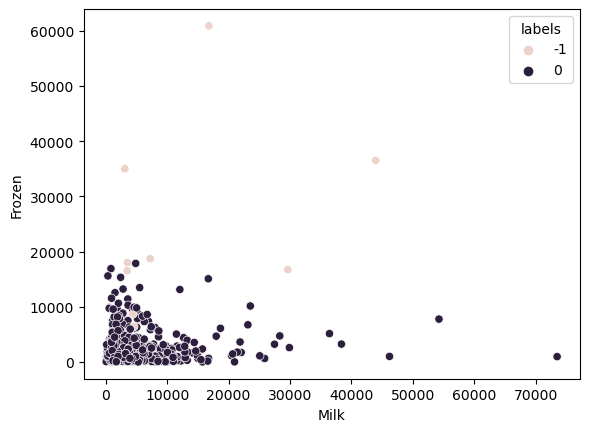

the relation cluster of Milk and Detergents_Paper


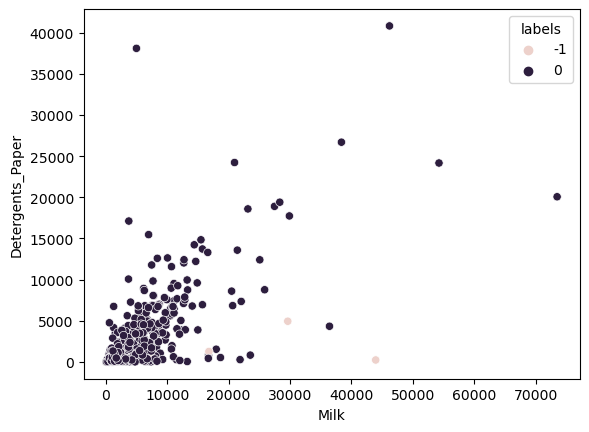

the relation cluster of Milk and Delicassen


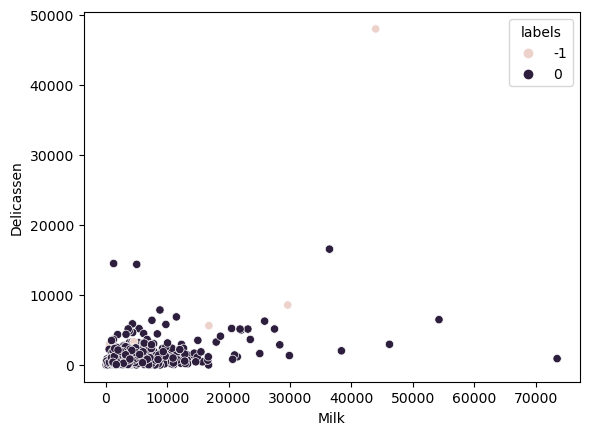

the relation cluster of Milk and labels


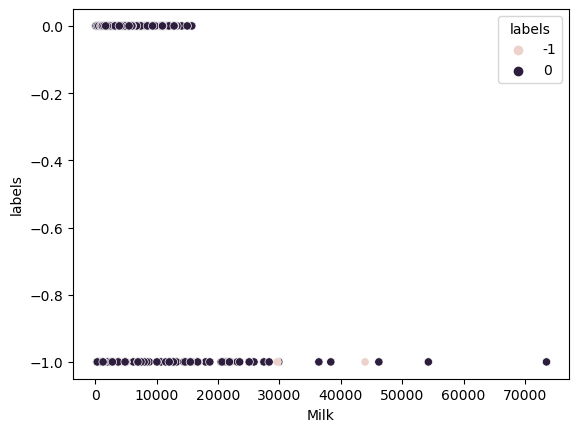

the relation cluster of Grocery and Fresh


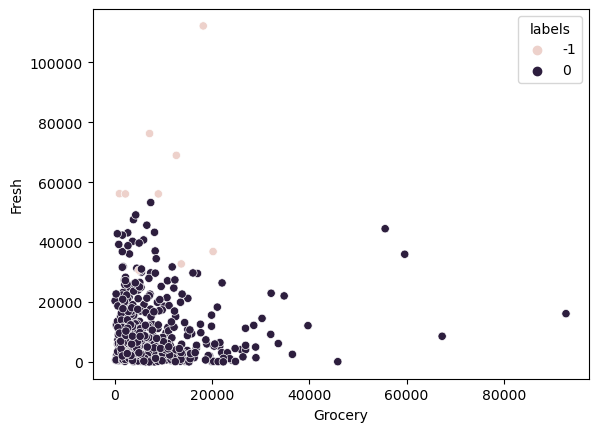

the relation cluster of Grocery and Milk


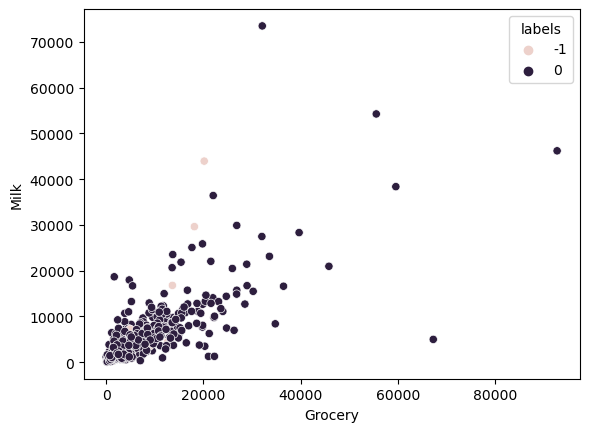

the relation cluster of Grocery and Grocery


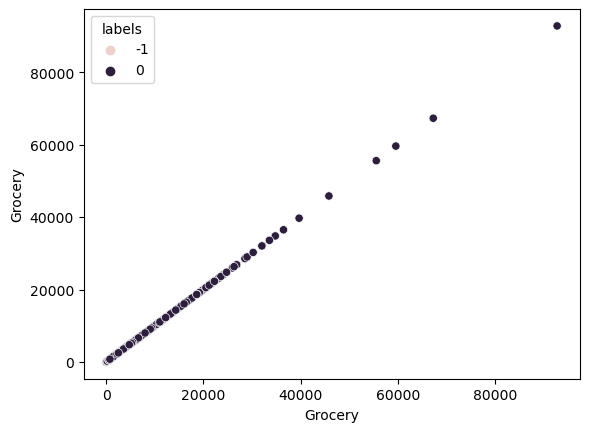

the relation cluster of Grocery and Frozen


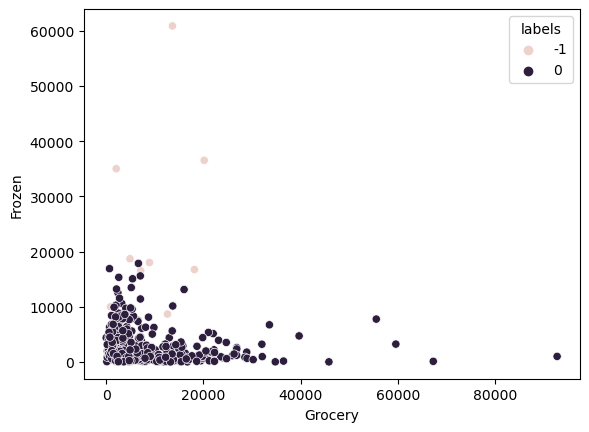

the relation cluster of Grocery and Detergents_Paper


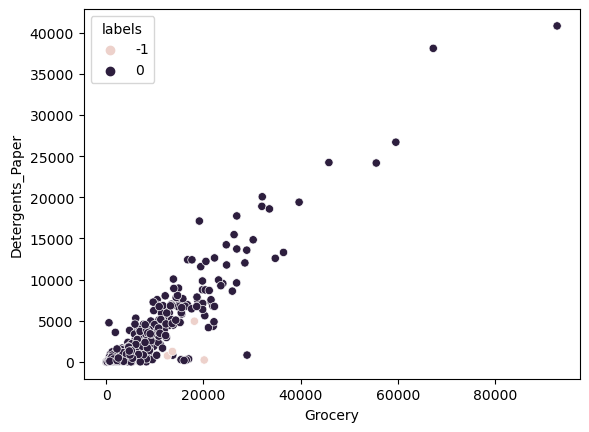

the relation cluster of Grocery and Delicassen


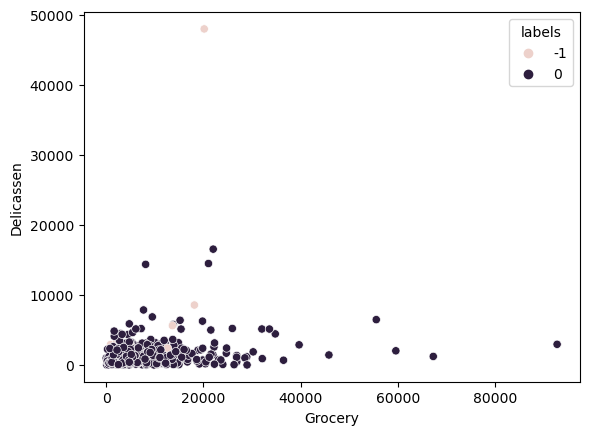

the relation cluster of Grocery and labels


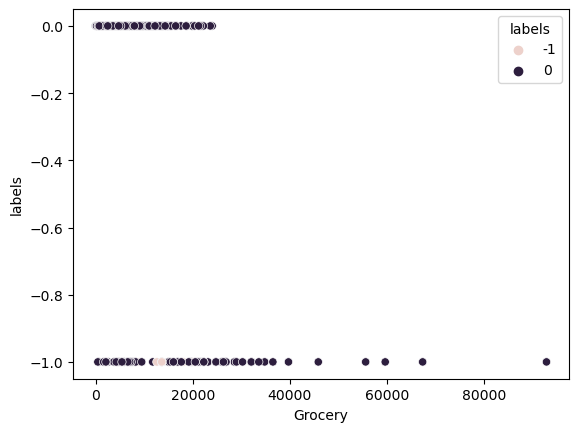

the relation cluster of Frozen and Fresh


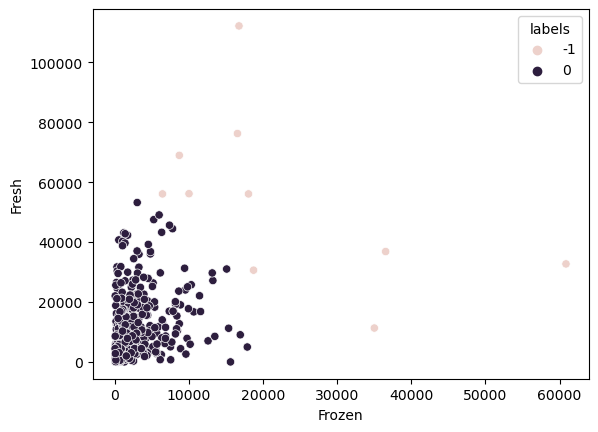

the relation cluster of Frozen and Milk


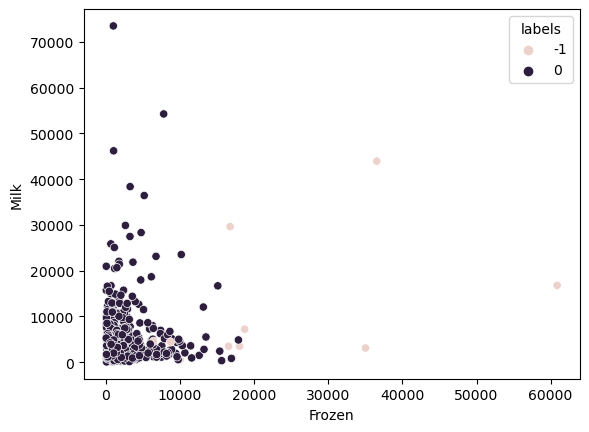

the relation cluster of Frozen and Grocery


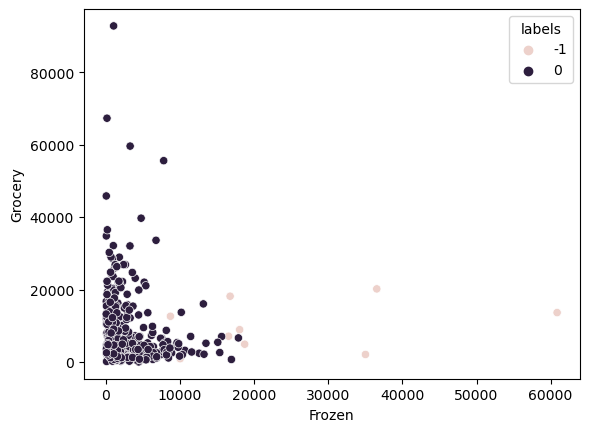

the relation cluster of Frozen and Frozen


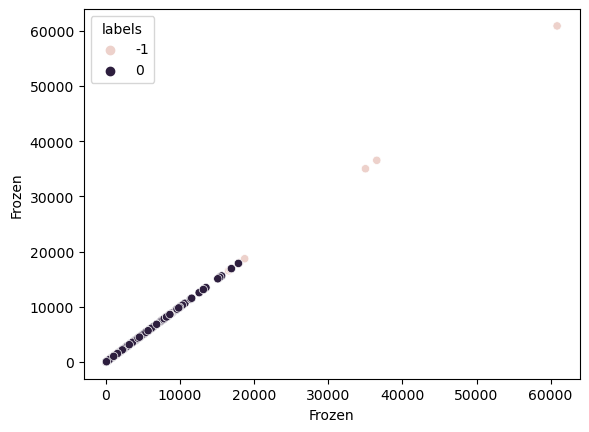

the relation cluster of Frozen and Detergents_Paper


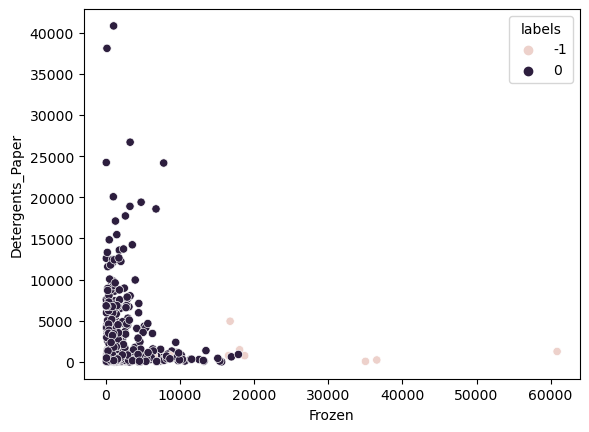

the relation cluster of Frozen and Delicassen


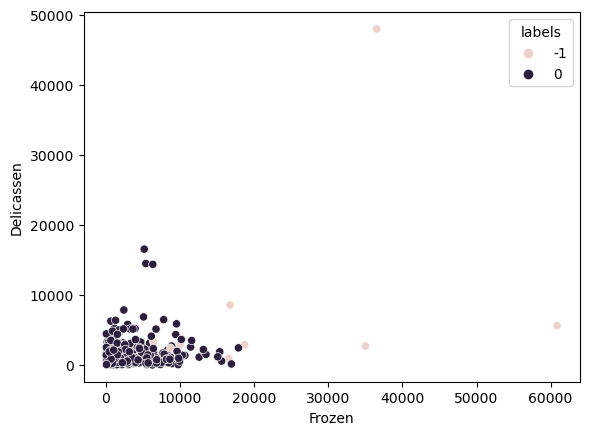

the relation cluster of Frozen and labels


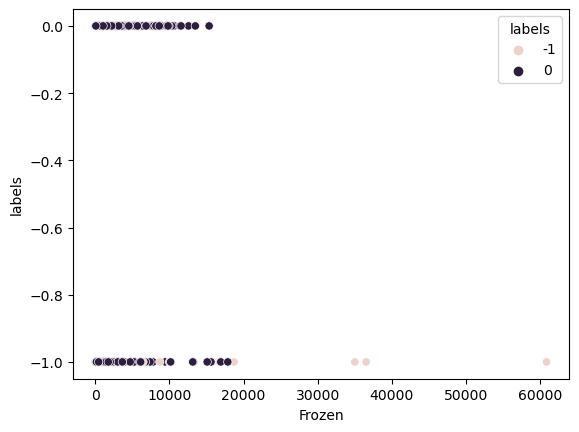

the relation cluster of Detergents_Paper and Fresh


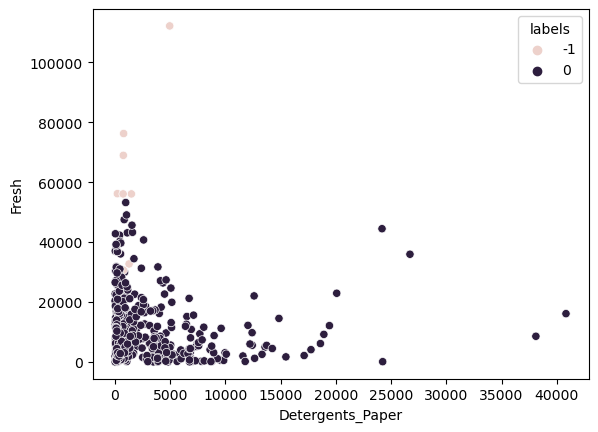

the relation cluster of Detergents_Paper and Milk


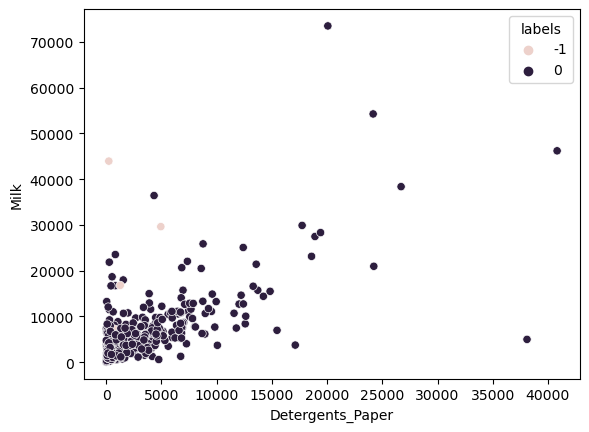

the relation cluster of Detergents_Paper and Grocery


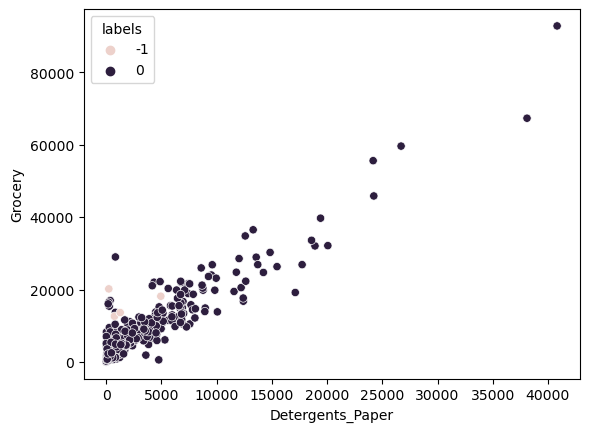

the relation cluster of Detergents_Paper and Frozen


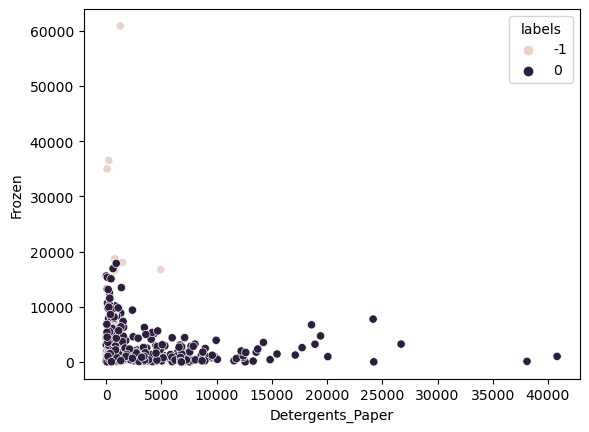

the relation cluster of Detergents_Paper and Detergents_Paper


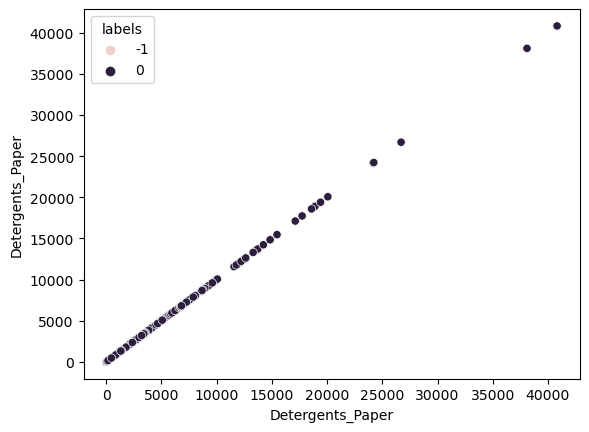

the relation cluster of Detergents_Paper and Delicassen


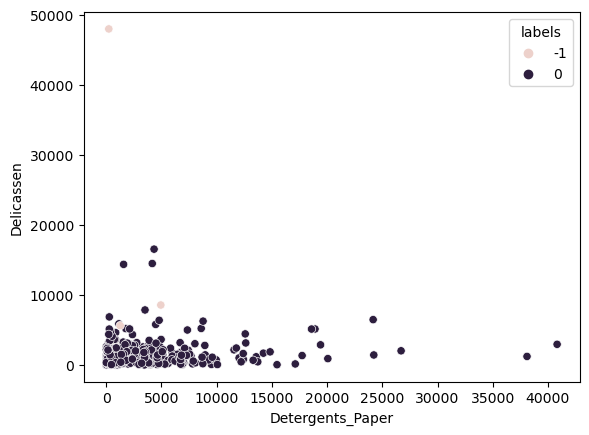

the relation cluster of Detergents_Paper and labels


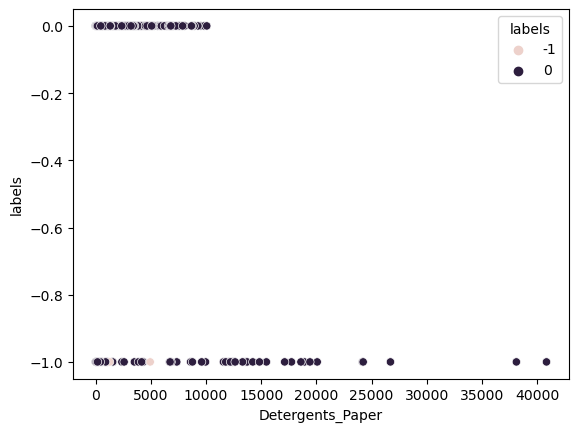

the relation cluster of Delicassen and Fresh


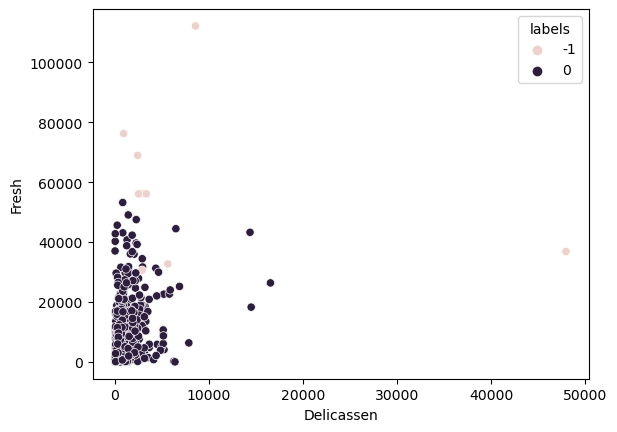

the relation cluster of Delicassen and Milk


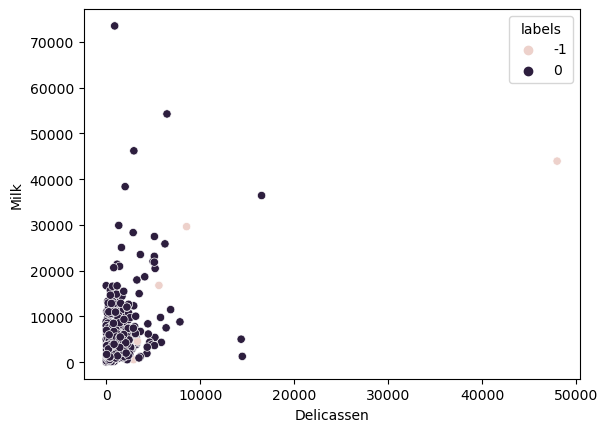

the relation cluster of Delicassen and Grocery


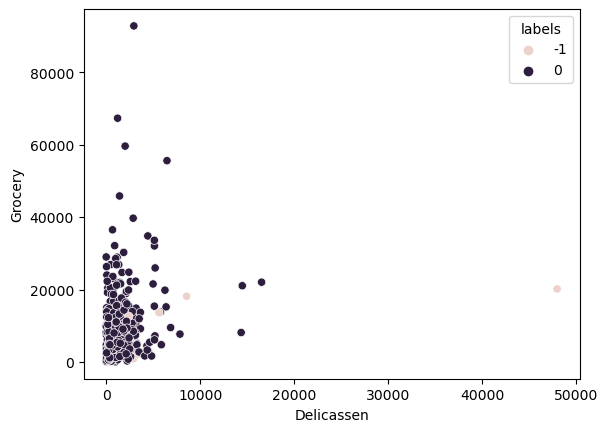

the relation cluster of Delicassen and Frozen


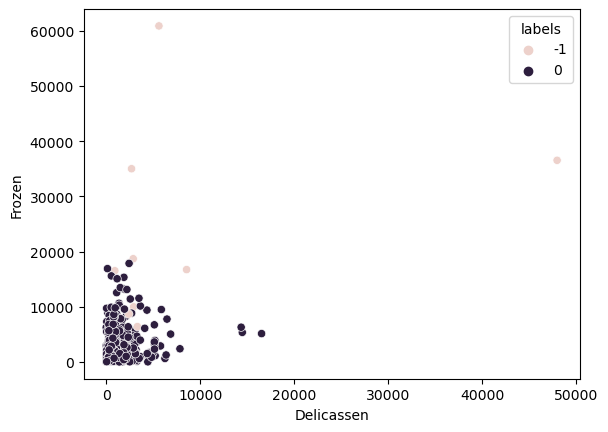

the relation cluster of Delicassen and Detergents_Paper


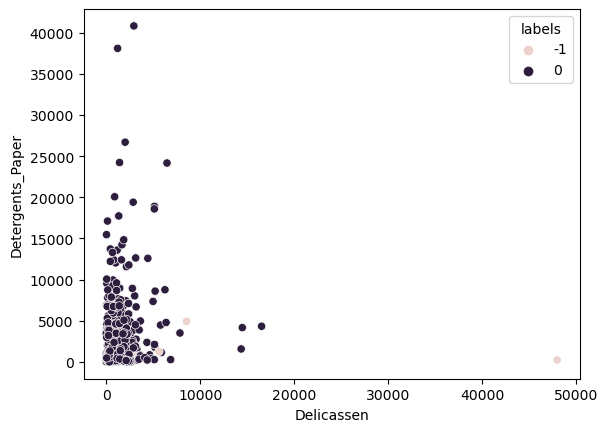

the relation cluster of Delicassen and Delicassen


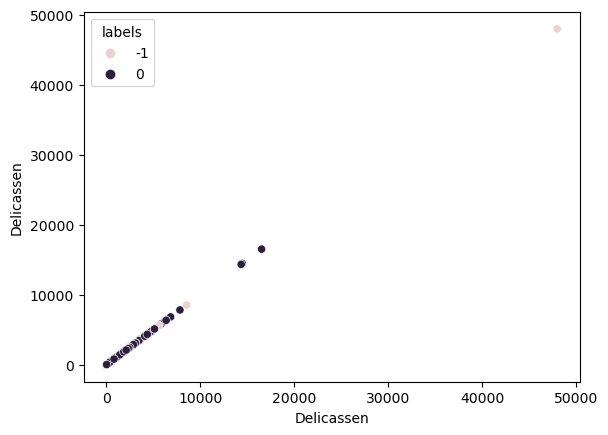

the relation cluster of Delicassen and labels


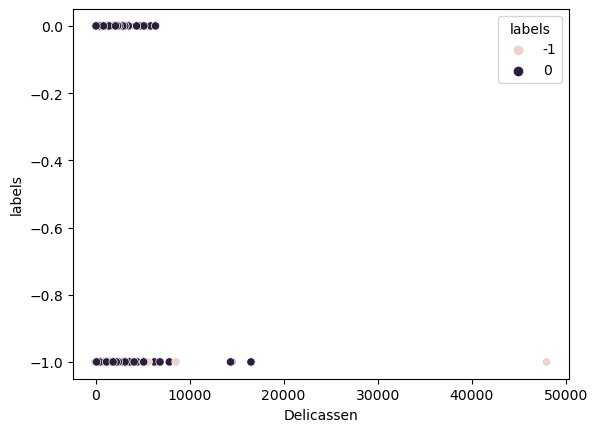

the relation cluster of labels and Fresh


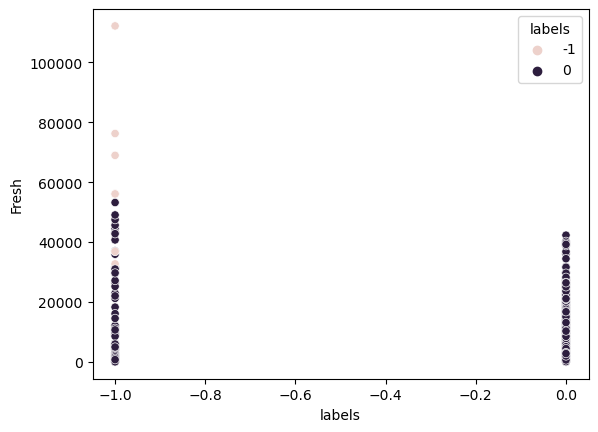

the relation cluster of labels and Milk


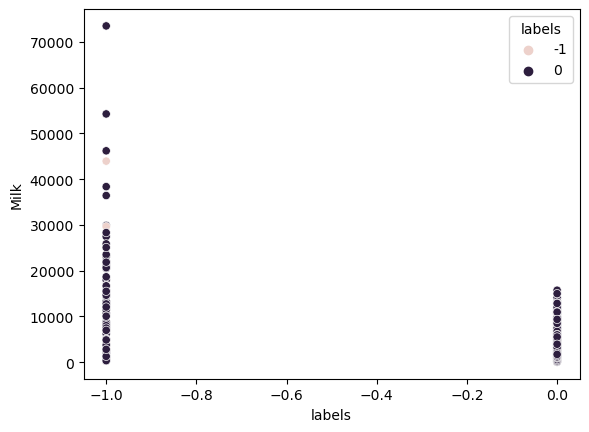

the relation cluster of labels and Grocery


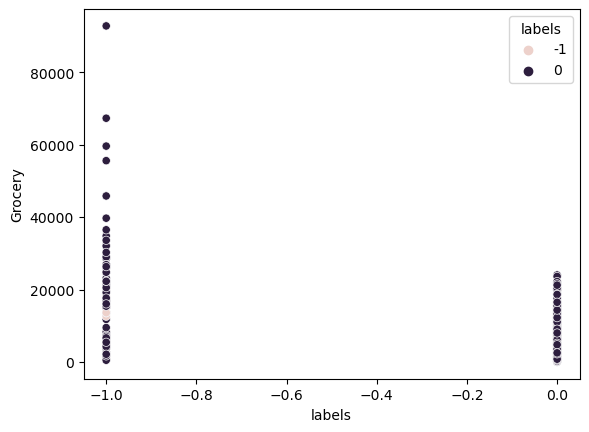

the relation cluster of labels and Frozen


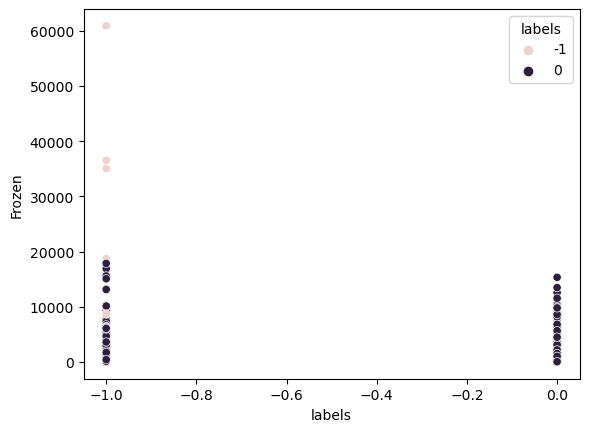

the relation cluster of labels and Detergents_Paper


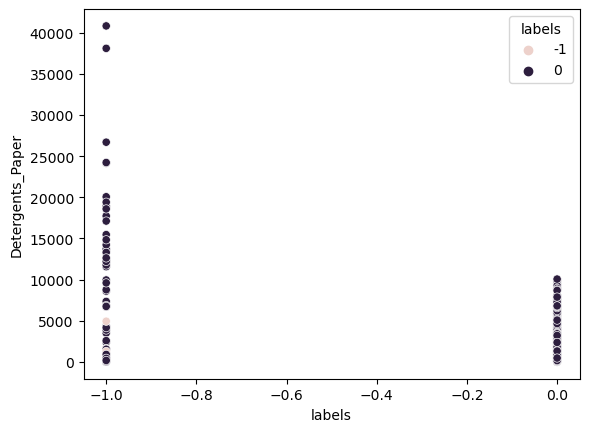

the relation cluster of labels and Delicassen


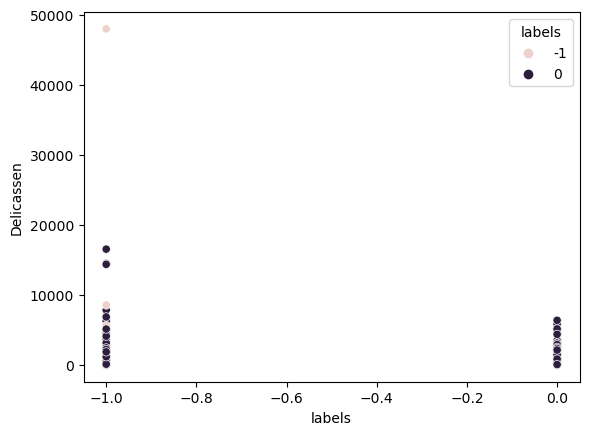

the relation cluster of labels and labels


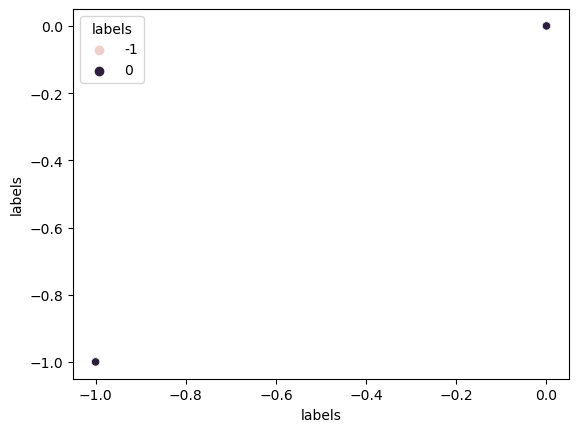

In [21]:
# this will plot all combonations of scatterplot relationships
for col in clus.columns:
    for col1 in clus.columns:
        print(f'the relation cluster of {col} and {col1}')
        sns.scatterplot(x=clus[col], y=clus[col1], hue=df.labels)
        
        plt.show()
    
    

In [22]:
# fresh and fresh, i see some -1 label in the 0 cluster

In [23]:
clus.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'labels'],
      dtype='object')

# `Curriculum Logs`

In [24]:
def acquire_logs(user=env.username, password=env.password, host=env.host):

    """
    This function retrieves data from the curriculum_logs database using the provided
    user credentials and host. It returns a pandas DataFrame with the date, endpoint, 
    user_id, cohort_id, and source_ip for each log entry.
    
    Args:
    - user (str): the username to connect to the database (default: env.username)
    - password (str): the password to connect to the database (default: env.password)
    - host (str): the host address to connect to the database (default: env.host)
    
    Returns:
    - df (pandas.DataFrame): a DataFrame with the log data
    """ 
    
    # create url from credentials
    url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/curriculum_logs'
    # query to be sent to sql
    query = '''
    SELECT date,
           path as endpoint,
           user_id,
           cohort_id,
           ip as source_ip
    FROM logs;
    
    '''
    # read-sql command with our query and url
    df = pd.read_sql(query, url)
    return df

In [25]:
def one_user_df_prep(df, user):
    
    """
    This function prepares a pandas DataFrame containing log data for a single user. 
    The DataFrame is filtered to only include log data for the specified user, and 
    the date column is converted to a datetime data type and set as the DataFrame's index. 
    The function then aggregates the data by day and counts the number of endpoints 
    accessed by the user each day. The resulting Series is returned.
    
    Args:
    - df (pandas.DataFrame): a DataFrame with log data
    - user (int): the user ID for the user to filter the data by
    
    Returns:
    - pages_one_user (pandas.Series): a Series with daily endpoint/ page counts for the specified user
    """
    
    # create a mask and a copy of our dataframe
    df = df[df.user_id == user].copy()
    
    # create datetime object
    df.date = pd.to_datetime(df.date)
    
    # set index using datetime
    df = df.set_index(df.date)
    
    # create a list of end paths and resample them by day, create dataframe
    
    pages_one_user = df['endpoint'].resample('d').count()
    
    # return df
    return pages_one_user

In [26]:
def compute_pct_b(pages_one_user, span, weight, user):
    
    """
    This function computes the percent bandwidth (pct_b) for a single user's log data, 
    which is a measure of how far away the user's activity is from the moving average 
    of the activity. The function takes a Series with daily endpoint counts for a user, 
    a span for the moving average, a weight for the standard deviation used to calculate 
    the upper and lower bands, and the user ID. The function calculates the midband, 
    standard deviation, upper band, and lower band for the data, concatenates these 
    into a DataFrame, and calculates the pct_b using the upper and lower bands and the 
    daily endpoint counts. The resulting DataFrame includes the daily endpoint counts, 
    midband, upper and lower bands, pct_b, and user ID for each day.
    
    Args:
    - pages_one_user (pandas.Series): a Series with daily endpoint counts for a single user
    - span (int): the span for the moving average used to calculate the midband and standard deviation
    - weight (float): the weight for the standard deviation used to calculate the upper and lower bands
    - user (int): the user ID for the user whose data is being analyzed
    
    Returns:
    - my_df (pandas.DataFrame): a DataFrame with daily endpoint counts, midband, upper and lower bands, 
      pct_b, and user ID for the specified user
    """
     
   
    # calculate the midband, standard deviation, upper band, and lower band using exponential 
    # weighted moving averages           
    midband = pages_one_user.ewm(span=span).mean()
    
    stdev = pages_one_user.ewm(span=span).std()
                
    # creating upper and lowerband using the midband and stdev
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # concat the upper and lower band
    bb = pd.concat([ub, lb], axis=1)
            
    # concatenate the daily endpoint counts, midband, and upper and lower bands into a DataFrame
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    
    # naming the columns
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # calculate the pct_b using the upper and lower bands and the daily endpoint counts
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    
    # adding user number to applied to the user_id column
    my_df['user_id'] = user
    return my_df

In [27]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    
    This function finds anomalous activity in a single user's log data using percent bandwidth (pct_b) bands. 
    The function takes a DataFrame with date, endpoint, user ID, cohort ID, and source IP columns,
    the user ID, the span parameter for the exponential moving average, the weight parameter for the 
    standard deviation multiplier, and a boolean value indicating whether to plot the data or not.
    The function calculates the daily endpoint counts, midband, upper and lower bands, pct_b, and user ID 
    using the one_user_df_prep and compute_pct_b functions. If plot=True, the function also calls the plot_bands 
    function to plot the daily endpoint counts, midband, and bands over time using Matplotlib. 
    The function returns a DataFrame with the same columns as my_df, but only including rows where the pct_b 
    value is greater than 1, indicating anomalous activity.
    
    Args:
    - df (pandas.DataFrame): a DataFrame with date, endpoint, user ID, cohort ID, and source IP columns
    - user (int): the user ID for the user whose data is being analyzed
    - span (int): the span parameter for the exponential moving average used to calculate the midband and 
      standard deviation of the daily endpoint counts
    - weight (int): the weight parameter for the standard deviation multiplier used to calculate the upper 
      and lower bands of the pct_b bands
    - plot (bool): whether to plot the daily endpoint counts, midband, and pct_b bands over time or not. 
      Default is False.
      
    Returns:
    - pandas.DataFrame: a DataFrame with the same columns as my_df, but only including rows where the pct_b 
      value is greater than 1, indicating anomalous activity.

    '''
    pages_one_user = one_user_df_prep(df, user)
    
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    if plot:
        plot_bands(my_df, user)
    
    return my_df[my_df.pct_b>1]

In [28]:
df = acquire_logs(user=env.username, password=env.password, host=env.host)


In [29]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [30]:
id_counts = df.groupby(['user_id'])['date', 'endpoint', 'cohort_id'].nunique()

/var/folders/d0/5dr5q0n145vcn3_m9dxy1xq80000gn/T/ipykernel_26313/3405430605.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  id_counts = df.groupby(['user_id'])['date', 'endpoint', 'cohort_id'].nunique()


In [31]:
# for every user, how many different days, how many times they accessed a page, their cohort_id
id_counts.head(3)

,date,endpoint,cohort_id
user_id,,,
1,637,976,2
2,83,151,1
3,107,169,1


In [32]:
# convert to date time
df['date'] = pd.to_datetime(df['date'])

In [33]:
# finding the first access
first_access = df.groupby('user_id')['date'].min()
first_access

user_id
1     2018-01-26
2     2018-01-26
3     2018-01-26
4     2018-01-26
5     2018-01-26
         ...    
977   2021-04-12
978   2021-04-12
979   2021-04-12
980   2021-04-13
981   2021-04-19
Name: date, Length: 981, dtype: datetime64[ns]

In [34]:

id_by_first_access_date = pd.DataFrame({'first_access_date': first_access}).reset_index()
id_by_first_access_date

,user_id,first_access_date
0,1,2018-01-26
1,2,2018-01-26
2,3,2018-01-26
3,4,2018-01-26
4,5,2018-01-26
...,...,...
976,977,2021-04-12
977,978,2021-04-12
978,979,2021-04-12
979,980,2021-04-13


In [35]:
id_by_first_access_date = id_by_first_access_date.groupby('first_access_date').count()\
.rename(columns={'user_id':'count_of_unique_ids'})

In [36]:
# HOW MANY PEOPLE HAD THIS SAME EXACT START DATE
id_by_first_access_date

,count_of_unique_ids
first_access_date,
2018-01-26,50
2018-01-27,2
2018-01-28,2
2018-01-29,12
2018-01-30,7
...,...
2021-04-08,1
2021-04-11,1
2021-04-12,26


# VISUAL

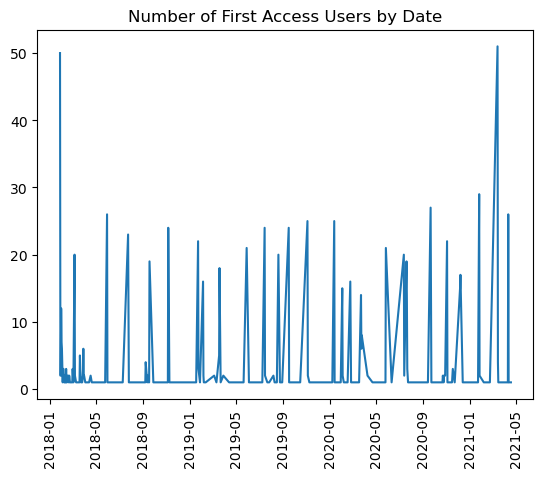

In [37]:
plt.plot(id_by_first_access_date)
plt.xticks(rotation=90)
plt.title('Number of First Access Users by Date')
plt.show()

In [38]:
page_views = df.groupby(['user_id'])['endpoint'].agg(['count', 'nunique'])

In [45]:
page_views.sort_values(by = 'count').tail(10)

,count,nunique
user_id,,
248,5075,625
344,5460,216
428,5897,266
581,6434,354
495,6451,243
1,7404,976
314,7783,225
53,12329,333
64,16347,437


In [47]:
# create the object
scaler = MinMaxScaler().fit(page_views)
# use the scaler
scaled_page_views = scaler.transform(page_views)

In [48]:
 # whip up some new column names
scaled_cols = [col + '_scaled' for col in page_views.columns]

In [49]:
scaled_page_views_df = pd.DataFrame(scaled_page_views, columns=scaled_cols, index=page_views.index)


In [50]:
# create the object first
dbsc = DBSCAN(min_samples=20, eps=0.1)

In [51]:
# fit the object like we normally would with sklearn
dbsc.fit(scaled_page_views_df)

DBSCAN(eps=0.1, min_samples=20)

In [52]:
# Merge the scaled and non-scaled values into one dataframe
page_views_total = page_views.merge(
    scaled_page_views_df, on=page_views.index).drop(
    columns=['key_0'])

In [53]:
page_views_total

,count,nunique,count_scaled,nunique_scaled
0,7404,976,0.413298,1.000000
1,1541,151,0.085976,0.153846
2,1562,169,0.087148,0.172308
3,692,143,0.038577,0.145641
4,1701,197,0.094908,0.201026
...,...,...,...,...
976,86,12,0.004745,0.011282
977,55,18,0.003015,0.017436
978,127,20,0.007034,0.019487
979,3,1,0.000112,0.000000


In [54]:
page_views_total['labels'] = dbsc.labels_


In [55]:
page_views_total

,count,nunique,count_scaled,nunique_scaled,labels
0,7404,976,0.413298,1.000000,-1
1,1541,151,0.085976,0.153846,0
2,1562,169,0.087148,0.172308,0
3,692,143,0.038577,0.145641,0
4,1701,197,0.094908,0.201026,0
...,...,...,...,...,...
976,86,12,0.004745,0.011282,0
977,55,18,0.003015,0.017436,0
978,127,20,0.007034,0.019487,0
979,3,1,0.000112,0.000000,0


<AxesSubplot:xlabel='count', ylabel='nunique'>

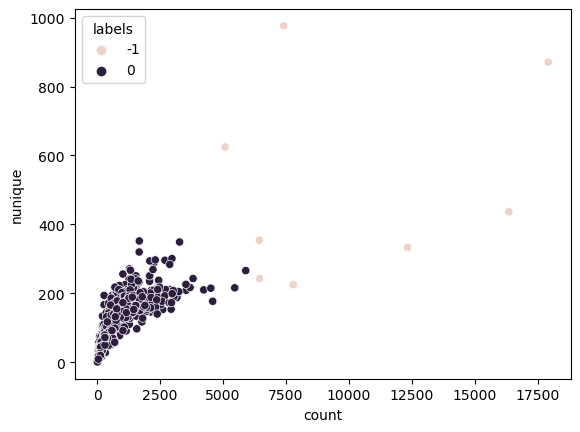

In [56]:
sns.scatterplot(data=page_views_total, x='count', y='nunique', hue='labels')

# wine

In [57]:
red = pd.read_csv('winequality-red.csv')

In [58]:
red = red.dropna()

In [59]:
red.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
dtype: int64

In [60]:
dfse = red.values.astype('float32',copy = False)
    
   

In [61]:
# Make the scaler
scaler = MinMaxScaler()

    # Fit the scaler
scaler.fit(dfse) 

MinMaxScaler()

In [62]:
    # Use the scaler
dfse = scaler.transform(dfse)
        
    # # Make the object
dbsc = DBSCAN(eps = .20, min_samples = 20)

    # Fit the object
dbsc.fit(dfse)
    
    

DBSCAN(eps=0.2, min_samples=20)

In [63]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + column for column in red.columns]


In [64]:
    # Save a copy of the original dataframe
original_red = red.copy()

   

In [65]:
 # Create a dataframe containing the scaled values
scaled_red = pd.DataFrame(dfse, columns=scaled_columns)

In [66]:
# Merge the scaled and non-scaled values into one dataframe

In [67]:
scaled_red.head(1)

,Scaled_fixed acidity,Scaled_volatile acidity,Scaled_citric acid,Scaled_residual sugar,Scaled_chlorides,Scaled_free sulfur dioxide,Scaled_total sulfur dioxide,Scaled_density,Scaled_pH,Scaled_sulphates,Scaled_alcohol,Scaled_quality
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567543,0.606299,0.137725,0.153846,0.4


In [68]:
red.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
frames = [red, scaled_red]

In [70]:
red = pd.concat(frames,axis=1)

In [71]:
# how are they all anomalies
red['labels'] = dbsc.labels_
red.labels.value_counts()

-1    1098
 0     314
 1     149
 2      38
Name: labels, dtype: int64

In [75]:
anomalies = red[red.labels == -1]

In [76]:
anomalies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,Scaled_residual sugar,Scaled_chlorides,Scaled_free sulfur dioxide,Scaled_total sulfur dioxide,Scaled_density,Scaled_pH,Scaled_sulphates,Scaled_alcohol,Scaled_quality,labels
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,0.068493,0.105175,0.225352,0.190813,0.582230,0.330709,0.149701,0.215385,0.6,-1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,...,0.020548,0.088481,0.197183,0.053004,0.332596,0.511811,0.083832,0.246154,0.8,-1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,...,0.075342,0.101836,0.112676,0.042403,0.494125,0.488189,0.143713,0.169231,0.8,-1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,...,0.356164,0.098498,0.225352,0.339223,0.567543,0.480315,0.281437,0.323077,0.4,-1
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,...,0.356164,0.098498,0.225352,0.339223,0.567543,0.480315,0.281437,0.323077,0.4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,...,0.068493,0.093489,0.380282,0.113074,0.472832,0.535433,0.293413,0.169231,0.6,-1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,0.075342,0.130217,0.436620,0.134276,0.354622,0.559055,0.149701,0.323077,0.4,-1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,...,0.089041,0.083472,0.535211,0.159011,0.370773,0.614173,0.257485,0.430769,0.6,-1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,...,0.075342,0.105175,0.436620,0.134276,0.396477,0.653543,0.227545,0.276923,0.4,-1
